In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from Higgs.tools.ImplementationUtils import (
    readHEPDataCsv,
    implementPairDecayLimit,
    fromHB5Table1,
    read_csv_from_web,
    implementPairProductionLimit
)
from Higgs import bounds as HB
from Higgs import predictions as HP
from Higgs import Predictions

import os, sys

sys.path.insert(0, os.path.dirname(os.path.dirname(os.path.dirname(os.getcwd()))))
import MassResolutions as resolution


# ATLAS 13TeV LHC

## `V h125 > a a > bbbb` [1806.07355](https://arxiv.org/abs/1806.07355)


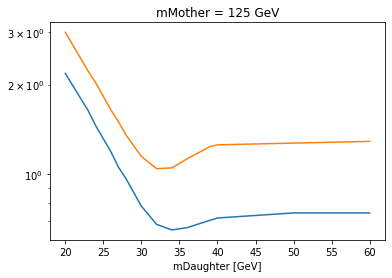

Looks good. Saving this to HV_LHC13_ATLAS_36.json


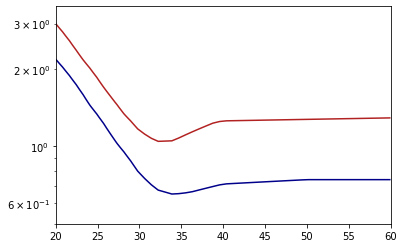

In [2]:
df = fromHB5Table1("7355_Atlas_VH-aa-bbbb_13TeV_36.1fb-1", "ATLAS").rename(
    columns={"m": "mDaughter1"}
)
df["mMother"] = 125
limitFile = implementPairDecayLimit(
    "1806.07355",
    {
        "production": ["HZ", "HW"],
        "firstDecay": ["bb"],
        "secondDecay": ["bb"],
    },
    "Fig. 9 (bottom)",
    df,
    massResolution={
        "firstDaughter": resolution.bb["medMass"],  # guess
        "secondDaughter": resolution.bb["medMass"],
        "mother": {"absolute": 15, "relative": 0},
    },
    constraints={
        "mother": [
            {
                "modelLike": "SMHiggs",
                "process": {
                    "channels": [
                        ["ggHZ", "none"],
                        ["qqHZ", "none"],
                        ["bbHZ", "none"],
                        ["HW", "none"],
                    ]
                },
            }
        ]
    },
    idSuffix=1,
)
lim = HB.Limit(limitFile)

pred = Predictions()
hh = pred.addParticle(HP.NeutralScalar("hh"))
hh.setMass(125)
refCxn = HP.SMHiggs(125).cxn("LHC13", "HZ") + HP.SMHiggs(125).cxn("LHC13", "HW")
h1 = pred.addParticle(HP.NeutralScalar("h1"))
h1.setDecayWidth("bb", 1.0)
hm = np.linspace(20, 60)
r = np.linspace(0.5, 3.5)


def testAgainstLimit(mass, rate):
    HP.effectiveCouplingInput(hh, HP.scaledSMlikeEffCouplings(np.sqrt(rate / refCxn)))
    hh.setTotalWidth(0)
    hh.setDecayWidth("h1", "h1", 1.0)
    h1.setMass(mass)
    app = lim.apply(pred)
    if len(app) == 0:
        print("Limit not applied for ", mass, rate)
        return (0, 0)
    return (app[0].expRatio(), app[0].obsRatio())


test = np.frompyfunc(testAgainstLimit, 2, 2)
XX, YY = np.meshgrid(hm, r)
expR, obsR = test(XX, YY)
fig, ax = plt.subplots()
ax.set_yscale("log")
expCc = ax.contour(hm, r, expR, levels=[1], colors=["darkblue"])
obsCc = ax.contour(hm, r, obsR, levels=[1], colors=["firebrick"])
expCc.collections[0].set_label("expRatio = 1")
obsCc.collections[0].set_label("obsRatio = 1")
plt.show()


## `W h125 > a a > bbbb` [1806.07355](https://arxiv.org/abs/1806.07355)


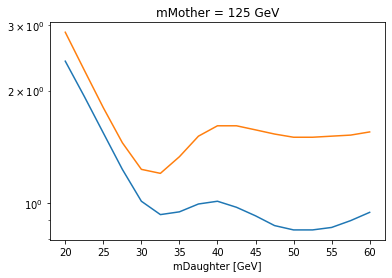

Looks good. Saving this to HW_LHC13_ATLAS_36.json


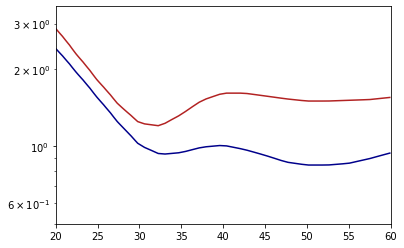

In [3]:
df = pd.DataFrame(
    {
        "mDaughter1": np.arange(20, 60.1, 2.5),
        "obs": [
            2.87,
            2.27,
            1.80,
            1.45,
            1.23,
            1.20,
            1.33,
            1.51,
            1.61,
            1.61,
            1.57,
            1.53,
            1.50,
            1.50,
            1.51,
            1.52,
            1.55,
        ],
        "exp": [
            2.40,
            1.93,
            1.54,
            1.23,
            1.01,
            0.930,
            0.946,
            0.993,
            1.01,
            0.973,
            0.923,
            0.869,
            0.846,
            0.846,
            0.859,
            0.896,
            0.943,
        ],
        "mMother": 125,
    }
)
limitFile = implementPairDecayLimit(
    "1806.07355",
    {
        "production": ["HW"],
        "firstDecay": ["bb"],
        "secondDecay": ["bb"],
    },
    "Fig. 9 (top-left)",
    df,
    massResolution={
        "firstDaughter": resolution.bb["medMass"],  # guess
        "secondDaughter": resolution.bb["medMass"],
        "mother": {"absolute": 15, "relative": 0},
    },
    idSuffix=2,
)
lim = HB.Limit(limitFile)

pred = Predictions()
hh = pred.addParticle(HP.NeutralScalar("hh"))
hh.setMass(125)
hh.setDecayWidth("h1", "h1", 1.0)
h1 = pred.addParticle(HP.NeutralScalar("h1"))
h1.setDecayWidth("bb", 1.0)
hm = np.linspace(20, 60)
r = np.linspace(0.5, 3.5)


def testAgainstLimit(mass, rate):
    hh.setCxn("LHC13", "HW", rate)
    h1.setMass(mass)
    app = lim.apply(pred)
    if len(app) == 0:
        print("Limit not applied for ", mass, rate)
        return (0, 0)
    return (app[0].expRatio(), app[0].obsRatio())


test = np.frompyfunc(testAgainstLimit, 2, 2)
XX, YY = np.meshgrid(hm, r)
expR, obsR = test(XX, YY)
fig, ax = plt.subplots()
ax.set_yscale("log")
expCc = ax.contour(hm, r, expR, levels=[1], colors=["darkblue"])
obsCc = ax.contour(hm, r, obsR, levels=[1], colors=["firebrick"])
expCc.collections[0].set_label("expRatio = 1")
obsCc.collections[0].set_label("obsRatio = 1")
plt.show()


## `Z h125 > a a > bbbb` [1806.07355](https://arxiv.org/abs/1806.07355)


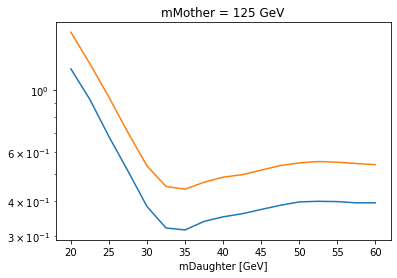

Looks good. Saving this to HZ_LHC13_ATLAS_36.json


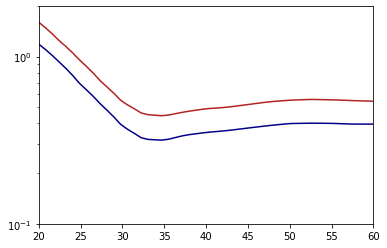

In [4]:
df = pd.DataFrame(
    {
        "mDaughter1": np.arange(20, 60.1, 2.5),
        "obs": [
            1.61,
            1.24,
            0.942,
            0.704,
            0.535,
            0.452,
            0.442,
            0.468,
            0.488,
            0.498,
            0.517,
            0.537,
            0.549,
            0.555,
            0.552,
            0.546,
            0.541,
        ],
        "exp": [
            1.19,
            0.924,
            0.681,
            0.513,
            0.383,
            0.321,
            0.316,
            0.339,
            0.352,
            0.361,
            0.374,
            0.387,
            0.398,
            0.400,
            0.399,
            0.395,
            0.395,
        ],
        "mMother": 125,
    }
)
limitFile = implementPairDecayLimit(
    "1806.07355",
    {
        "production": ["HZ"],
        "firstDecay": ["bb"],
        "secondDecay": ["bb"],
    },
    "Fig. 9 (top-right)",
    df,
    massResolution={
        "firstDaughter": resolution.bb["medMass"],  # guess
        "secondDaughter": resolution.bb["medMass"],
        "mother": {"absolute": 15, "relative": 0},
    },
    idSuffix=3,
    constraints={
        "mother": [
            {
                "modelLike": "SMHiggs",
                "process": {
                    "channels": [
                        ["ggHZ", "none"],
                        ["qqHZ", "none"],
                        ["bbHZ", "none"],
                    ]
                },
            }
        ]
    },
)
lim = HB.Limit(limitFile)

pred = Predictions()
hh = pred.addParticle(HP.NeutralScalar("hh"))
hh.setMass(125)
refCxn = HP.SMHiggs(125).cxn("LHC13", "HZ")
h1 = pred.addParticle(HP.NeutralScalar("h1"))
h1.setDecayWidth("bb", 1.0)
hm = np.linspace(20, 60)
r = np.linspace(0.1, 2)


def testAgainstLimit(mass, rate):
    HP.effectiveCouplingInput(hh, HP.scaledSMlikeEffCouplings(np.sqrt(rate / refCxn)))
    hh.setTotalWidth(0)
    hh.setDecayWidth("h1", "h1", 1.0)
    h1.setMass(mass)
    app = lim.apply(pred)
    if len(app) == 0:
        print("Limit not applied for ", mass, rate)
        return (0, 0)
    return (app[0].expRatio(), app[0].obsRatio())


test = np.frompyfunc(testAgainstLimit, 2, 2)
XX, YY = np.meshgrid(hm, r)
expR, obsR = test(XX, YY)
fig, ax = plt.subplots()
ax.set_yscale("log")
expCc = ax.contour(hm, r, expR, levels=[1], colors=["darkblue"])
obsCc = ax.contour(hm, r, obsR, levels=[1], colors=["firebrick"])
expCc.collections[0].set_label("expRatio = 1")
obsCc.collections[0].set_label("obsRatio = 1")
plt.show()


## `H > hSM hSM > bbbb` [1804.06174](https://arxiv.org/abs/1804.06174)


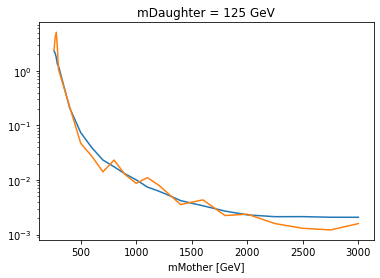

Looks good. Saving this to H_LHC13_ATLAS_36.json


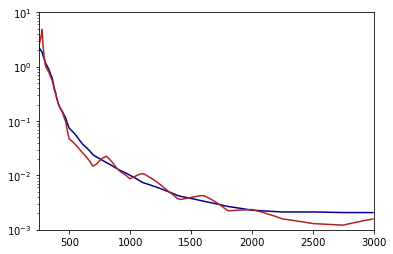

In [5]:
dfs = readHEPDataCsv(
    "https://www.hepdata.net/download/table/ins1668124/Table%201/1/csv"
)
df = dfs[0].rename(
    columns={"Mass of scalar [GEV]": "mMother", "Observed limit [fb]": "obs"}
)
assert np.allclose(df.mMother, dfs[1].iloc[:, 0])
df["exp"] = dfs[1]["Expected limit [fb]"]
df["mDaughter1"] = 125
# fb to pb
df.obs /= 1e3
df.exp /= 1e3
limitFile = implementPairDecayLimit(
    "1804.06174",
    {
        "production": ["H"],
        "firstDecay": ["bb"],
        "secondDecay": ["bb"],
    },
    "https://doi.org/10.17182/hepdata.82599.v1/t1",
    df,
    massResolution={
        "firstDaughter": {"absolute": 30, "relative": 0},  # guess
        "secondDaughter": {"absolute": 30, "relative": 0},
        "mother": resolution.bb["highMass"],
    },
)
lim = HB.Limit(limitFile)

pred = Predictions()
hh = pred.addParticle(HP.NeutralScalar("hh"))
h1 = pred.addParticle(HP.NeutralScalar("h1"))
hh.setDecayWidth("h1", "h1", 1.0)
h1.setDecayWidth("bb", 1.0)
h1.setMass(125)
hm = np.linspace(250, 3000, 100)
r = np.logspace(-3, 1)


def testAgainstLimit(mass, rate):
    hh.setMass(mass)
    hh.setCxn("LHC13", "ggH", rate)
    app = lim.apply(pred)
    if len(app) == 0:
        print("Limit not applied for ", mass, rate)
        return (0, 0)
    return (app[0].expRatio(), app[0].obsRatio())


test = np.frompyfunc(testAgainstLimit, 2, 2)
XX, YY = np.meshgrid(hm, r)
expR, obsR = test(XX, YY)
fig, ax = plt.subplots()
ax.set_yscale("log")
expCc = ax.contour(hm, r, expR, levels=[1], colors=["darkblue"])
obsCc = ax.contour(hm, r, obsR, levels=[1], colors=["firebrick"])
expCc.collections[0].set_label("expRatio = 1")
obsCc.collections[0].set_label("obsRatio = 1")
plt.show()


## non-res `pp > h125 h125 > bbbb` [1804.06174](https://arxiv.org/abs/1804.06174)

In [2]:
df = pd.DataFrame({"m": [125], "obs": 12.9, "exp": 20.7})
smRefCxn = 11.3e-3
df.obs *= smRefCxn
df.exp *= smRefCxn
limitFile = implementPairProductionLimit(
    "1804.06174",
    {"firstDecay": ["bb"], "secondDecay": ["bb"]},
    "Tab. 8",
    df,
    idSuffix=1,
    massResolution={  # guess +-20
        "firstParticle": {"absolute": 40, "relative": 0.0},
        "secondParticle": {"absolute": 40, "relative": 0.0},
    },
)

lim = HB.Limit(limitFile)

pred = Predictions()
hh = pred.addParticle(HP.NeutralScalar("hh"))
hh.setCxn("LHC13", "pair", 1.0)
hh.setDecayWidth("bb", 1.0)
hh.setMass(125)
res = lim.apply(pred)
print(res)
assert np.isclose(res[0].obsRatio(), 1.0 / df.obs[0])
assert np.isclose(res[0].expRatio(), 1.0 / df.exp[0])


Looks good. Saving this to nonres_LHC13_ATLAS_36.json
[<Higgs.bounds.AppliedLimit limitId: 1804061741, obsRatio: 6.860, expRatio: 4.275, for: ["hh", "+", "hh"]>]


## `vbfH > hSM hSM > bbbb` [2001.05178](https://arxiv.org/abs/2001.05178)


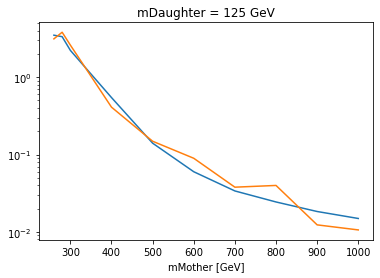

Looks good. Saving this to vbfH_LHC13_ATLAS_126.json


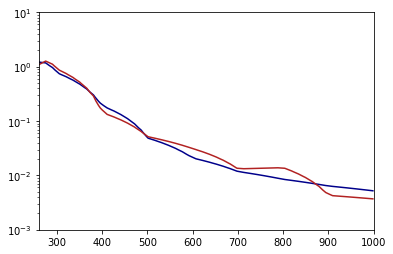

In [6]:
dfs = readHEPDataCsv(
    "https://www.hepdata.net/download/table/ins1775750/Table%204/4/csv"
)
df = dfs[0].rename(
    columns={
        "Mass [GeV]": "mMother",
        "Observed cross-section upper limit at 95% CL [fb]": "obs",
    }
)
assert np.allclose(df.mMother, dfs[1]["Mass [GeV]"])
df["exp"] = dfs[1]["Expected cross-section upper limit at 95% CL $\pm 1 \sigma$ [fb]"]
df["mDaughter1"] = 125
refBr = HP.SMHiggs(125).br("bb") ** 2
# fb to pb and * BR(HH>4b)
df.obs /= 1e3 * refBr
df.exp /= 1e3 * refBr
limitFile = implementPairDecayLimit(
    "2001.05178",
    {
        "production": ["vbfH"],
        "firstDecay": ["bb"],
        "secondDecay": ["bb"],
    },
    "https://doi.org/10.17182/hepdata.91237.v4/t4",
    df,
    massResolution={
        "firstDaughter": {"absolute": 2 * 11.6, "relative": 0},  # eq 1
        "secondDaughter": {"absolute": 2 * 18.1, "relative": 0},  # eq 1
        "mother": resolution.bb["highMass"],
    },
)
lim = HB.Limit(limitFile)

pred = Predictions()
hh = pred.addParticle(HP.NeutralScalar("hh"))
h1 = pred.addParticle(HP.NeutralScalar("h1"))
hh.setDecayWidth("h1", "h1", 1.0)
h1.setDecayWidth("bb", 1.0)
h1.setMass(125)
hm = np.linspace(260, 1000)
r = np.logspace(-3, 1)


def testAgainstLimit(mass, rate):
    hh.setMass(mass)
    hh.setCxn("LHC13", "vbfH", rate / refBr)
    app = lim.apply(pred)
    if len(app) == 0:
        print("Limit not applied for ", mass, rate)
        return (0, 0)
    return (app[0].expRatio(), app[0].obsRatio())


test = np.frompyfunc(testAgainstLimit, 2, 2)
XX, YY = np.meshgrid(hm, r)
expR, obsR = test(XX, YY)
fig, ax = plt.subplots()
ax.set_yscale("log")
expCc = ax.contour(hm, r, expR, levels=[1], colors=["darkblue"])
obsCc = ax.contour(hm, r, obsR, levels=[1], colors=["firebrick"])
expCc.collections[0].set_label("expRatio = 1")
obsCc.collections[0].set_label("obsRatio = 1")
plt.show()


# ATLAS 8TeV LHC

## `H > hSM hSM > bbbb` [1506.00285](https://arxiv.org/abs/1506.00285)


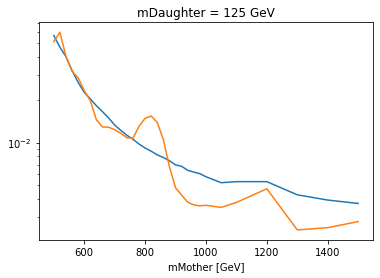

Looks good. Saving this to comb_LHC8_ATLAS_20.json


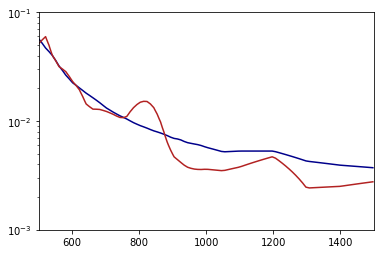

In [7]:
df = pd.DataFrame(
    {
        "mMother": np.concatenate(
            (np.arange(500, 1000, 20), [1000, 1050], np.arange(1100, 1500.1, 100))
        ),
        "obs": [
            51.55,
            60.0,
            40.45,
            31.75,
            28.66,
            23.3,
            19.73,
            14.48,
            12.88,
            12.84,
            12.33,
            11.63,
            10.81,
            10.72,
            13.03,
            14.82,
            15.39,
            13.86,
            10.5,
            6.74,
            4.8,
            4.26,
            3.8,
            3.63,
            3.58,
            3.61,
            3.49,
            3.78,
            4.72,
            2.42,
            2.51,
            2.77,
        ],
        "exp": [
            56.92,
            47.09,
            40.34,
            32.22,
            26.57,
            22.63,
            20.31,
            18.18,
            16.51,
            14.91,
            13.3,
            12.19,
            11.26,
            10.56,
            9.76,
            9.15,
            8.69,
            8.19,
            7.84,
            7.44,
            6.96,
            6.8,
            6.37,
            6.19,
            6.03,
            5.74,
            5.21,
            5.3,
            5.3,
            4.28,
            3.93,
            3.72,
        ],
        "mDaughter1": 125,
    }
)
df.obs /= 1e3  # fb to pb
df.exp /= 1e3
limitFile = implementPairDecayLimit(
    "1506.00285",
    {
        "production": ["H", "vbfH"],
        "firstDecay": ["bb"],
        "secondDecay": ["bb"],
    },
    "Fig. 14c",
    df,
    massResolution={
        "firstDaughter": {"absolute": 2 * 0.1 * 125, "relative": 0},  # eq 1
        "secondDaughter": {"absolute": 2 * 0.1 * 125, "relative": 0},
        "mother": resolution.bb["highMass"],
    },
)
lim = HB.Limit(limitFile)

pred = Predictions()
hh = pred.addParticle(HP.NeutralScalar("hh"))
h1 = pred.addParticle(HP.NeutralScalar("h1"))
hh.setDecayWidth("h1", "h1", 1.0)
h1.setDecayWidth("bb", 1.0)
h1.setMass(125)
hm = np.linspace(500, 1500, 100)
r = np.logspace(-3, -1)


def testAgainstLimit(mass, rate):
    hh.setMass(mass)
    hh.setCxn("LHC8", "ggH", rate)
    app = lim.apply(pred)
    if len(app) == 0:
        print("Limit not applied for ", mass, rate)
        return (0, 0)
    return (app[0].expRatio(), app[0].obsRatio())


test = np.frompyfunc(testAgainstLimit, 2, 2)
XX, YY = np.meshgrid(hm, r)
expR, obsR = test(XX, YY)
fig, ax = plt.subplots()
ax.set_yscale("log")
expCc = ax.contour(hm, r, expR, levels=[1], colors=["darkblue"])
obsCc = ax.contour(hm, r, obsR, levels=[1], colors=["firebrick"])
expCc.collections[0].set_label("expRatio = 1")
obsCc.collections[0].set_label("obsRatio = 1")
plt.show()
